# Módulo 10 atividade 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
#Foi informado que os atributos Unnamed:0 e index não acrescentam informações apra análise, assim seráo exluídas.
df.drop(['Unnamed: 0','index'],axis = 1, inplace = True)

In [8]:
df.columns

Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [5]:
df.describe()


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.00000,12466.000000,15000.000000,15000.000000
mean,0.437267,43.84140,7.750462,2.219067,4624.632946
std,0.760594,11.22917,6.780216,0.922352,4628.571729
min,0.000000,22.00000,0.191781,1.000000,159.900000
25%,0.000000,34.00000,3.016438,2.000000,1945.740000
50%,0.000000,43.00000,6.016438,2.000000,3278.260000
75%,1.000000,53.00000,10.183562,3.000000,5642.365000
max,14.000000,68.00000,42.906849,15.000000,89918.040000


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [14]:
df_var_quantitativas = df.select_dtypes(include = 'number')
df_var_quantitativas.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

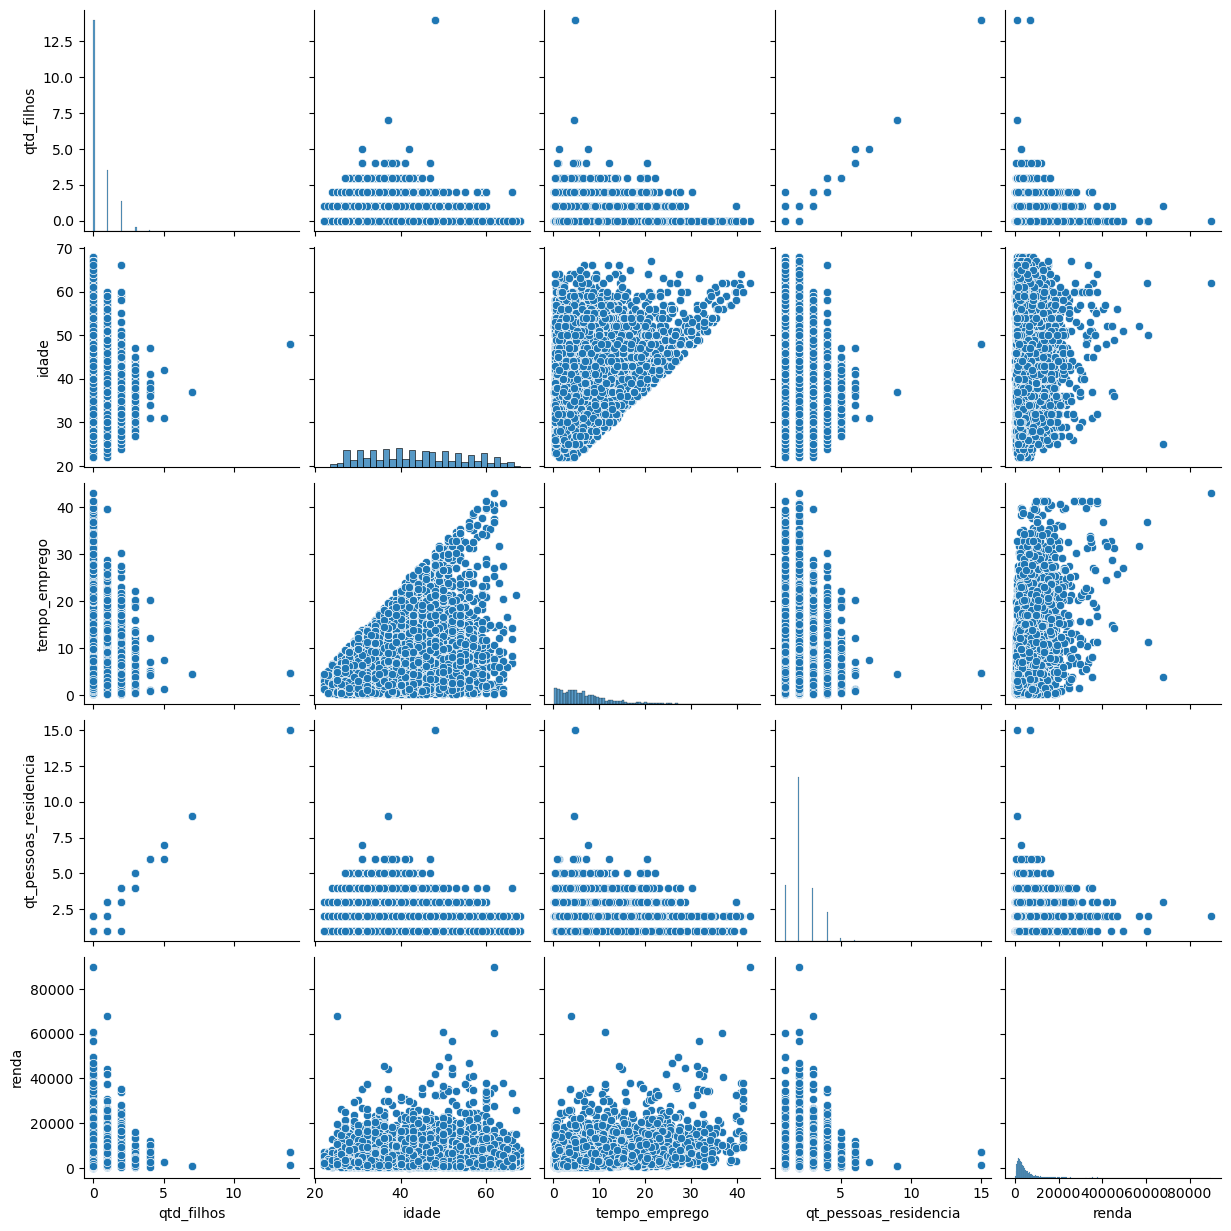

In [13]:
#_ = sns.regplot(x='tempo_emprego', y='renda', data = df)
sns.pairplot(df_var_quantitativas)


Os gráficos de dispersão acima sugerem que existe uma possivel relação não linear entre os atributos qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia e renda. Já para os gráficos qt_pessoas_residencia versus idade, tempo_emprego versus idade sugerem uma relação linear positiva

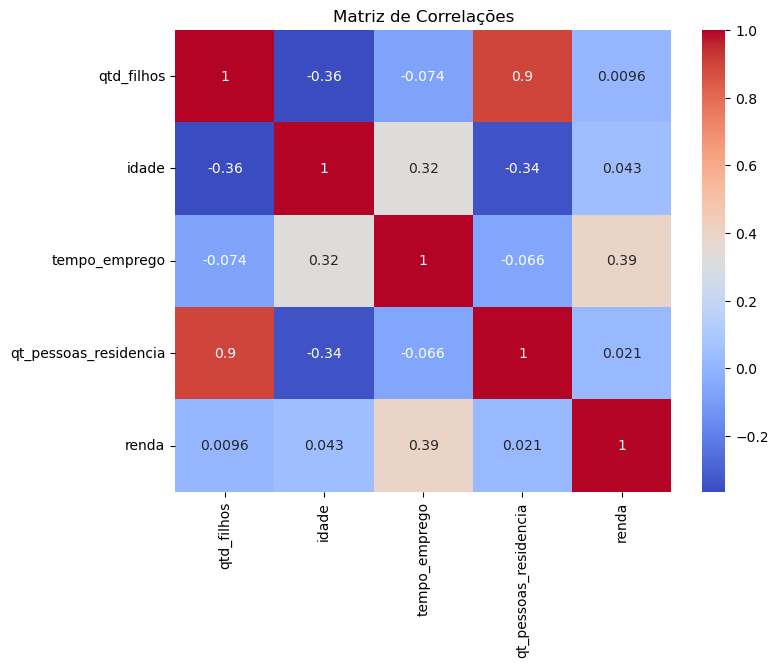

In [12]:
# Calcular a matriz de correlações
matriz_correlacao = df_var_quantitativas.corr()

# Plotar a matriz de correlações
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlações')
plt.show()

A matriz de correção mostra que há apenas uma correlção positivo e bastante forte que é a relação entre qtd_filho versus qt_pessoas_residencia (0.9), todas as demais variáveis aprensentam coeficiente de correlação de 0.39 (Moderado Positivo) a -0.36 (Moderado Negativo). Esses coeficientes moderados podem implicar que outros fatores podem ter um impacto mais significativo na realção entre esses atributos.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

A partir do heatmap da questão 1, observa-se que de acordo com o coeficiente de correlação as duas variável mais correlacioanadas com a renda são tempo_emprego e idade, respectivamente

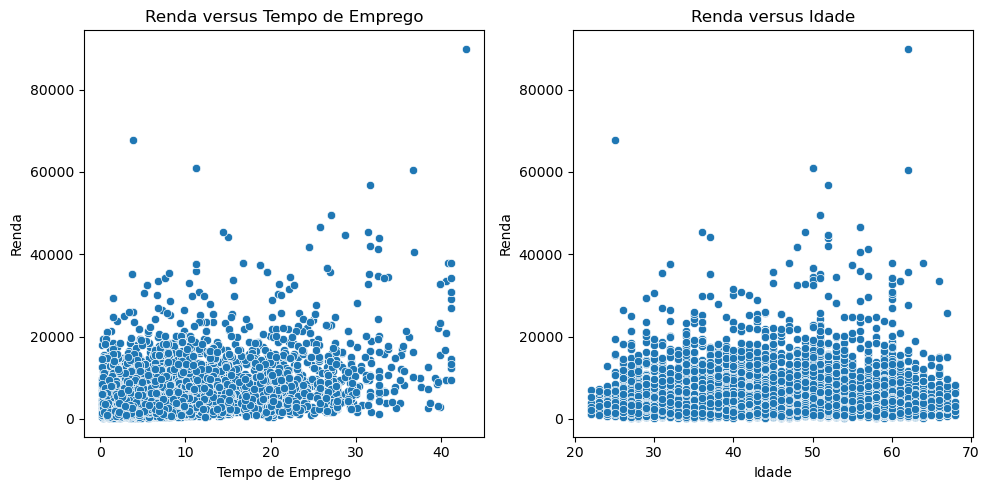

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1: renda versus tempo_emprego
sns.scatterplot(data=df_var_quantitativas, x='tempo_emprego', y='renda', ax = axs[0])
axs[0].set_xlabel('Tempo de Emprego')
axs[0].set_ylabel('Renda')
axs[0].set_title('Renda versus Tempo de Emprego')

# Gráfico 2: renda versus idade
sns.scatterplot(data=df_var_quantitativas, x='idade', y='renda', ax=axs[1])
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Renda')
axs[1].set_title('Renda versus Idade')


# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe a figura
plt.show()

Em ambos os gráfico de dispersão é possível inferir que a maioria das pessoas aprensentam uma renda menos de R$ 20.000,00 e que poucas pessoas possuem uma renda mais alta. Ao percorrer o eixo do Tempo de Emprego e de idade nota-se que a renda tende a se espalhar em uma faixa mais ampla, o que pode está relaconado ao fato de boa parte das pessoas estarem em diferentes estágios de tempo de emprego ou idade. E, por fim há presença de rendas extremamente altas

3) Na su aopinião, há outliers na variável renda?

SIm. Como foi dito anteriormente, ha rendas extremametne altas, o que caracteriza os outlliers

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [22]:
df_var_quantitativas_log = df_var_quantitativas.copy()
df_var_quantitativas_log['log_renda'] = np.log(df_var_quantitativas_log['renda'])
df_var_quantitativas_log

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,1,36,3.575342,3.0,3369.24,8.122442
1,0,42,0.860274,2.0,6096.14,8.715411
2,2,31,8.065753,4.0,5658.98,8.640999
3,0,50,1.208219,2.0,7246.69,8.888300
4,0,52,13.873973,2.0,4017.37,8.298383
...,...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29,7.084469
14996,1,30,12.079452,3.0,2519.18,7.831689
14997,0,40,2.161644,2.0,1586.85,7.369506
14998,0,47,3.295890,2.0,6975.39,8.850144


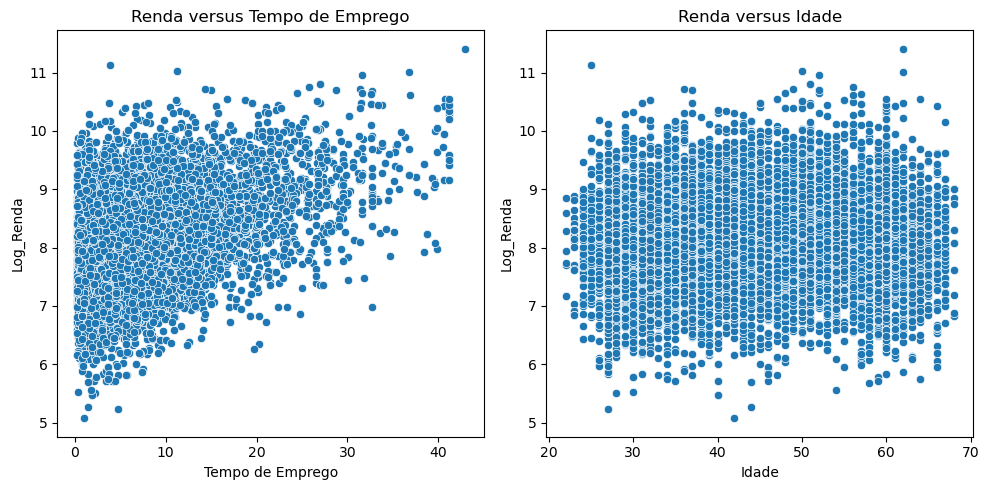

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1: renda versus tempo_emprego
sns.scatterplot(data=df_var_quantitativas_log, x='tempo_emprego', y='log_renda', ax = axs[0])
axs[0].set_xlabel('Tempo de Emprego')
axs[0].set_ylabel('Log_Renda')
axs[0].set_title('Renda versus Tempo de Emprego')

# Gráfico 2: renda versus idade
sns.scatterplot(data=df_var_quantitativas_log, x='idade', y='log_renda', ax=axs[1])
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Log_Renda')
axs[1].set_title('Renda versus Idade')


# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe a figura
plt.show()

Após a transformação logarítmica dos dados relativos a renda nota-se que: 
1 - No gráfico tempo_emprego versus Log_renda  após a transformação logarítmica, observa-se que à medida que o tempo de emprego aumenta, a renda também tende a aumentar, caracterizando uma relação positiva. Ha, no entanto, algumas observações que ainda continuam fora da relação positiva.

2 - No gráfico idade versus Log_renda  após a transformação logarítmica não se observa uma relação, seja ela positiva ou negativa. Porém, as observações sugere que existem grupos ou categorias específicas relacionadas à renda e idade. Isso pode indicar a presença de diferentes grupos demográficos, níveis de renda ou características individuais que influenciam a relação entre 'log_renda' e 'idade'.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicaçaõ do Log foi benéfica, pelo menos no relação de tempo_emprego e Log_renda, pois permitiu a linearização das relações não lineares entre as variáveis, apesar de não ter ocorrido o mesmo quando considerado Log_Renda e idade.